In [131]:
import pandas as pd
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
from sklearn.preprocessing import StandardScaler
import numpy as np
from IPython.display import IFrame as show
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='xpeigang', api_key='lwQSZWto6kkYyDeNh8SM')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [18]:
master_df = pd.read_csv("master_final_merged_df_protein_gdp.csv")

In [19]:
init_notebook_mode(connected=True)

### Analysis 1: PCA on different food sources

In [35]:
col_list = master_df.columns.tolist()
protein_col_list = col_list[4:19]

# Cereals is the total of others. No need to include it here 
protein_col_list.remove("Cereals")
protein_col_list_country = ["Country"]+protein_col_list

protein_group_df = master_df[protein_col_list_country]

# If Protein food group is empty. it is droped. 
df1 = protein_group_df[protein_group_df.isna().any(axis=1)]
print ("Dropped Countries:{}".format(df1["Country"]))
protein_group_df.dropna(inplace = True)

protein_group_scaled = StandardScaler().fit_transform(protein_group_df[protein_col_list])
protein_group_df

Dropped Countries:174                             Aruba
175                            Bhutan
176                    Cayman Islands
177                      Cook Islands
178                    Czech Republic
179                    CÃ´te d'Ivoire
180       Falkland Islands (Malvinas)
181                       Isle of Man
182                            Jersey
183                            Kosovo
184                             Nauru
185              Netherlands Antilles
186    Occupied Palestinian Territory
187                       Puerto Rico
188                             Qatar
189                          RÃ©union
190                        Seychelles
191                         Singapore
192              Syrian Arab Republic
193                         Greenland
194                     Liechtenstein
Name: Country, dtype: object


C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Country,Milk,Bovine meat,Sheep and goat meat,Pigmeat,Poultry,Eggs,Fish,Maize,Rice,Wheat,Rye,Barley,Pulses,Starchy roots
0,Afghanistan,6.02,2.01,2.02,0.00,0.79,0.32,0.02,0.57,2.89,37.12,0.00,0.72,1.56,0.22
1,Albania,29.67,9.18,5.35,2.76,4.91,3.24,1.50,0.36,1.22,33.71,0.13,0.03,3.06,1.86
2,Algeria,13.78,2.18,2.70,0.00,2.30,2.09,1.23,3.09,0.50,43.03,0.00,2.61,4.55,2.67
3,Angola,1.02,3.27,0.44,2.34,5.55,0.51,4.14,8.80,1.55,8.46,0.00,0.00,5.23,7.13
4,Antigua and Barbuda,12.22,5.39,0.60,3.26,18.59,1.30,13.11,0.39,2.15,13.39,0.00,0.00,1.66,0.86
5,Argentina,14.70,27.16,0.58,2.85,12.44,3.25,1.95,1.94,1.70,23.29,0.00,0.00,0.31,2.57
6,Armenia,19.04,7.72,1.08,2.11,4.71,3.44,1.09,0.01,0.67,30.16,0.02,0.25,0.00,1.93
7,Australia,19.16,14.05,3.21,5.61,15.88,2.20,6.20,0.89,1.90,18.62,0.31,0.06,0.62,2.25
8,Austria,21.55,6.90,0.40,14.66,7.85,4.39,3.99,2.35,0.70,20.91,2.28,0.01,0.45,2.25
9,Azerbaijan,14.07,5.09,2.86,0.07,3.51,2.31,0.64,1.83,0.39,49.37,0.04,0.61,0.59,3.18


### PCA

In [92]:
principalComponents = pca.fit_transform(protein_group_scaled)

pc_protein_1,pc_protein_2 = zip(*principalComponents)
protein_group_df["principal component 1"] = pc_protein_1
protein_group_df["principal component 2"] = pc_protein_2
principalDf = protein_group_df[["Country","principal component 1","principal component 2"]]
principalDf.to_csv("test1.csv")
X = principalDf[["principal component 1","principal component 2"]].values
principalDf.head()

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Country,principal component 1,principal component 2
0,Afghanistan,-0.518736,-1.454621
1,Albania,2.440719,-2.200208
2,Algeria,0.596646,-2.699386
3,Angola,-1.686584,-0.548387
4,Antigua and Barbuda,0.845285,1.230920


#### Continent Level

###### Countries to Continent 

In [93]:
# Code adapated from https://stackoverflow.com/questions/55910004/get-continent-name-from-country-using-pycountry

from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2,country_name_to_country_alpha3,country_alpha3_to_country_alpha2

continents_dict = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Eurpoe'
}
countries = principalDf['Country'].tolist()

def convert_continents(countries):
    """
    This function tries to get the continent based on Country name.
    Since some countries names are differnt in the library we are using here,
    need to manually change those.
    
    This function also tries to rechieve an alpha 3 Country Code based on the name. 
    """
    continents = []
    country_codes = []
    for country in countries:
        try:
            country_code = country_name_to_country_alpha3(country)
            continent = continents_dict[country_alpha2_to_continent_code(country_name_to_country_alpha2(country))]
            continents.append(continent)
            country_codes.append(country_code)
        except KeyError:
            print(country)
            continents.append(country)
            country_codes.append(country)
    return continents,country_codes


continents,country_codes = convert_continents(countries)

Bolivia (Plurinational State of)
China, Hong Kong SAR
China, Macao SAR
China, mainland
China, Taiwan Province of
Congo (note no data in Food suppley tables for DRC)
CÃƒÂ´te d'Ivoire
Iran (Islamic Republic of)
Republic of Korea
Eswatini
North Macedonia
Timor-Leste
Venezuela (Bolivarian Republic of)


In [94]:
# Make a new column called Continent using the continents information we just get. 
principalDf["Continent"] = continents

# A manually constructed country to contienent and country to country code list for those which have variation in names. 
manual_continent_dict = {"Bolivia (Plurinational State of)":"South America"
                         ,"China, Hong Kong SAR":"Asia"
                         ,"China, mainland":"Asia"
                         ,"China, Macao SAR":"Asia"
                         ,"China, Taiwan Province of":"Asia"
                         ,"Congo (note no data in Food suppley tables for DRC)":"Africa"
                         ,"CÃƒÂ´te d'Ivoire":"Africa"
                        ,"Iran (Islamic Republic of)":"Asia"
                        ,"Republic of Korea":"Asia"
                        ,"Eswatini":"Africa"
                        ,"North Macedonia":"Europe"
                        ,"Timor-Leste":"Asia"
                        ,"Venezuela (Bolivarian Republic of)":"South America"}

manual_country_code_dict = {"Bolivia (Plurinational State of)":"BOL"
                         ,"China, Hong Kong SAR":"HKG"
                         ,"China, mainland":"CHN"
                         ,"China, Macao SAR":"MAC"
                         ,"China, Taiwan Province of":"TWN"
                         ,"Congo (note no data in Food suppley tables for DRC)":"COG"
                         ,"CÃƒÂ´te d'Ivoire":"CIV"
                        ,"Iran (Islamic Republic of)":"IRN"
                        ,"Republic of Korea":"KOR"
                        ,"Eswatini":"SWZ"
                        ,"North Macedonia":"MKD"
                        ,"Republic of North Macedonia":"MKD"
                        ,"Timor-Leste":"TLS"
                        ,"Venezuela (Bolivarian Republic of)":"VEN"}

# Replace missing ones with correct continents. 
principalDf[principalDf["Country"].isna()]
# principalDf.to_csv("test.csv")
principalDf["Continent"] = principalDf["Continent"].replace(manual_continent_dict)


C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [95]:
# Code adapted from https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Data_Visualization_Iris_Dataset_Blog.ipynb
import matplotlib.pyplot as plt

def pca_plot(colors,df,cluster_name):
    """
    This function makes a plot using matplotlib, which uses Principal Component 1 as x and 2 as y.
    Colors represent clusters. 
    In this case, cluster can be Continent, Region, and Income group.  
    """
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 10)
    ax.set_ylabel('Principal Component 2', fontsize = 10)
    ax.set_title('2 component PCA {}'.format(cluster_name), fontsize = 20)

    
    cluster_list = df[cluster_name].unique()
    print(cluster_list)
    for cluster in zip(cluster_list,colors):
        indicesToKeep = df[cluster_name] == cluster
        ax.scatter(df.loc[indicesToKeep, 'principal component 1']
               , df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
    ax.legend(cluster_list)
    ax.grid()

['Asia' 'Eurpoe' 'Africa' 'North America' 'South America' 'Australia'
 'Europe']


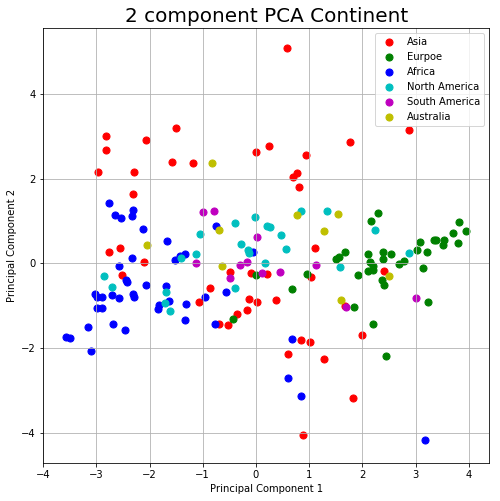

In [96]:
colors = ['r', 'g', 'b','c','m','y']
pca_plot(colors,principalDf,"Continent")

###### K means on Top of PCA (Unable to fix the legend here. Shape represents continent, and colors represent cluster)

In [115]:
#K means Clustering 
# Code adapted from https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Data_Visualization_Iris_Dataset_Blog.ipynb
from sklearn.cluster import KMeans

def perform_kmeans(X, n_clust):
    """
    This function handles K means clustering. 
    """
    model = KMeans(n_clust)
    model.fit(X)
    cluster_labels = model.predict(X)
    cent = model.cluster_centers_
    return (cluster_labels, cent)

def pca_kmeans_plot(colors, mark_shapes,df,cluster_name,centers):
    """
    This function makes a plot using matplotlib, which uses Principal Component 1 as x and 2 as y.
    Shapes represent clusters. 
    In this case, cluster can be Continent, Region, and Income group.  
    Colors represent the clusters kmeans assigns the point to. 
    """
    fig_k = plt.figure(figsize = (8,8))
    ax = fig_k.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 10)
    ax.set_ylabel('Principal Component 2', fontsize = 10)
    ax.set_title('2 component PCA Kmeans Clustering {}'.format(cluster_name), fontsize = 20)

    cluster_list = df[cluster_name].unique()

    for cluster, ms in zip(cluster_list,mark_shapes):
        for kmeans_cluster,color in zip([i for i in range(len(colors))],colors):
            indicesToKeep = (df[cluster_name] == cluster) & (df["{}_Cluster".format(cluster_name)] == kmeans_cluster)
            ax.scatter(df.loc[indicesToKeep, 'principal component 1']
                   , df.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , marker = ms
                   , s = 50)

    ax.legend(mark_shapes,cluster_list)
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    ax.grid()

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning:

Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning:

Legend does not support 'd' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

C:\Use

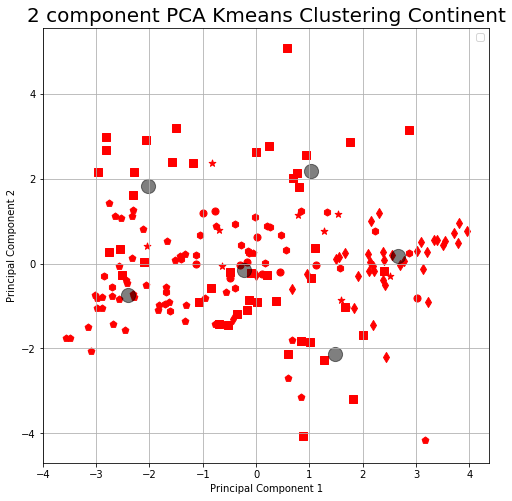

In [116]:

# Plot Contienent level 
X = principalDf[["principal component 1","principal component 2"]].values
continent_cluster_labels, continent_centers = perform_kmeans(X, 6)
principalDf["Continent_Cluster"] = continent_cluster_labels
mark_shapes = ['s','d','p','h','o','*']
colors = ['r', 'g', 'b','c','m','y']
pca_kmeans_plot(colors,mark_shapes,principalDf,"Continent",continent_centers)

In [150]:


def plot_plotly(df,cluster_name,centers,filename_prefix):
    """
    This function draws plots using plotly. 
    It draws different traces with different shape and color based on the cluster and kmeans cluster it belongs to.abs
    In this case, cluster can be Continent, Region, and Income group. 
    
    Shape represents it's original cluster, and color represents the cluster K means assigns it to. 
    """
    data = []
    rainbow_colorscale =  [
    'rgb(150,0,90)','rgb(0,0,200)',
    'rgb(0,25,255)', 'rgb(0,152,255)',
    'rgb(44,255,150)', 'rgb(151,255,0)',
    'rgb(255,234,0)','rgb(255,111,0)',
    'rgb(255,0,0)'
    ]
    cluster_list = df[cluster_name].unique()
    for ms,cluster in enumerate(cluster_list):
        for kmeans_cluster in range(len(cluster_list)):
            indicesToKeep = (df[cluster_name] == cluster) & (df["{}_Cluster".format(cluster_name)] == kmeans_cluster)
            trace0 = go.Scatter(
                x = df.loc[indicesToKeep, 'principal component 1'],
                y = df.loc[indicesToKeep, 'principal component 2'],
                name = str(cluster) + str(kmeans_cluster),
                mode = 'markers',
                marker = dict(
                    size = 9, 
                    color = rainbow_colorscale[kmeans_cluster],
                    line = dict(width = 1),
                    symbol = ms,
                ),
                text = df.loc[indicesToKeep, 'Country'],
            )
            data.append(trace0);
    
    trace1 = go.Scatter(
        x = centers[:, 0],
        y = centers[:, 1],
        name = "Center",
        mode = 'markers',
        marker = dict(
            size = 20, 
            color = 'rgba(220, 220, 220, .4)', 
            line = dict(width = 1),
            ),
            )
    data.append(trace1)

    layout= go.Layout(
        title= '2 component PCA Kmeans Clustering {}'.format(cluster_name),
        hovermode= 'closest',
        xaxis= dict(
            title= 'principal component 1',
            ticklen= 5,
            zeroline= False,
            gridwidth= 2,
        ),
        yaxis=dict(
            title= 'principal component 2',
            ticklen= 5,
            gridwidth= 2,
        ),
        showlegend= True
        )

    fig = dict(data=data, layout=layout)
    iplot(fig)
    py.iplot(fig, filename="{} {} Level Plot ".format(filename_prefix, cluster_name))

In [151]:
def text_display(df, indices, col_list):
    text = ''
    for col in col_list:
        print(df.loc[indices,col])
        text += '{}:{} \n'.format(col, df.loc[indices,col])
    return text 

In [152]:
# Attempt to show protein food info to show here in plotly

# principalDf_merged = principalDf.merge(master_df,how="left", on= "Country")
# merge_list = protein_col_list + ["Country", "principal component 1", "principal component 2", "Continent","Continent_Cluster"]
# principalDf_merged = principalDf_merged[merge_list]
# principalDf_merged.head()

In [153]:
# Calling plotly function 


plot_plotly(principalDf,"Continent",continent_centers,"Protein Foods")

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



#### Region Level

###### Add Region and Development Level

In [154]:
# Read in UN's country classification dataset. 
class_df = pd.read_excel("CLASS.xls",skiprows = 4)
class_df.head()

,x,x.1,Economy,Code,X,Region,Income group,Lending category,Other
0,x,x,x,x,x,x,x,x,x
1,1,NaN,Afghanistan,AFG,NaN,South Asia,Low income,IDA,HIPC
2,2,NaN,Albania,ALB,NaN,Europe & Central Asia,Upper middle income,IBRD,NaN
3,3,NaN,Algeria,DZA,NaN,Middle East & North Africa,Upper middle income,IBRD,NaN
4,4,NaN,American Samoa,ASM,NaN,East Asia & Pacific,Upper middle income,..,NaN


In [155]:
# Convert to Country Code Alpha 3 for easier merging 
protein_group_df["Code"] = country_codes
protein_group_df["Code"].replace(manual_country_code_dict, inplace = True)
protein_group_df.head()

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Country,Milk,Bovine meat,Sheep and goat meat,Pigmeat,Poultry,Eggs,Fish,Maize,Rice,Wheat,Rye,Barley,Pulses,Starchy roots,Code,principal component 1,principal component 2
0,Afghanistan,6.02,2.01,2.02,0.00,0.79,0.32,0.02,0.57,2.89,37.12,0.00,0.72,1.56,0.22,AFG,-0.518736,-1.454621
1,Albania,29.67,9.18,5.35,2.76,4.91,3.24,1.50,0.36,1.22,33.71,0.13,0.03,3.06,1.86,ALB,2.440719,-2.200208
2,Algeria,13.78,2.18,2.70,0.00,2.30,2.09,1.23,3.09,0.50,43.03,0.00,2.61,4.55,2.67,DZA,0.596646,-2.699386
3,Angola,1.02,3.27,0.44,2.34,5.55,0.51,4.14,8.80,1.55,8.46,0.00,0.00,5.23,7.13,AGO,-1.686584,-0.548387
4,Antigua and Barbuda,12.22,5.39,0.60,3.26,18.59,1.30,13.11,0.39,2.15,13.39,0.00,0.00,1.66,0.86,ATG,0.845285,1.230920


In [156]:
protein_group_merged_df = protein_group_df.merge(class_df,how= "left", on="Code")
protein_group_merged_df.head()

,Country,Milk,Bovine meat,Sheep and goat meat,Pigmeat,Poultry,Eggs,Fish,Maize,Rice,...,principal component 1,principal component 2,x,x.1,Economy,X,Region,Income group,Lending category,Other
0,Afghanistan,6.02,2.01,2.02,0.00,0.79,0.32,0.02,0.57,2.89,...,-0.518736,-1.454621,1,NaN,Afghanistan,NaN,South Asia,Low income,IDA,HIPC
1,Albania,29.67,9.18,5.35,2.76,4.91,3.24,1.50,0.36,1.22,...,2.440719,-2.200208,2,NaN,Albania,NaN,Europe & Central Asia,Upper middle income,IBRD,NaN
2,Algeria,13.78,2.18,2.70,0.00,2.30,2.09,1.23,3.09,0.50,...,0.596646,-2.699386,3,NaN,Algeria,NaN,Middle East & North Africa,Upper middle income,IBRD,NaN
3,Angola,1.02,3.27,0.44,2.34,5.55,0.51,4.14,8.80,1.55,...,-1.686584,-0.548387,6,NaN,Angola,NaN,Sub-Saharan Africa,Lower middle income,IBRD,NaN
4,Antigua and Barbuda,12.22,5.39,0.60,3.26,18.59,1.30,13.11,0.39,2.15,...,0.845285,1.230920,7,NaN,Antigua and Barbuda,NaN,Latin America & Caribbean,High income,IBRD,NaN


In [157]:
principalDf["Income group"] = protein_group_merged_df["Income group"]
principalDf["Region"] = protein_group_merged_df["Region"]
# master_merged_df.head()
principalDf.head()


C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Country,principal component 1,principal component 2,Continent,Continent_Cluster,Income group,Region
0,Afghanistan,-0.518736,-1.454621,Asia,4,Low income,South Asia
1,Albania,2.440719,-2.200208,Eurpoe,3,Upper middle income,Europe & Central Asia
2,Algeria,0.596646,-2.699386,Africa,3,Upper middle income,Middle East & North Africa
3,Angola,-1.686584,-0.548387,Africa,1,Lower middle income,Sub-Saharan Africa
4,Antigua and Barbuda,0.845285,1.230920,North America,2,High income,Latin America & Caribbean


['South Asia' 'Europe & Central Asia' 'Middle East & North Africa'
 'Sub-Saharan Africa' 'Latin America & Caribbean' 'East Asia & Pacific'
 'North America']


C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning:

Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning:

Legend does not support 'd' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

C:\Use

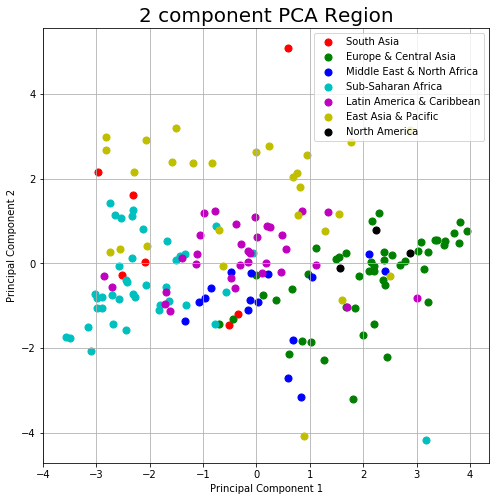

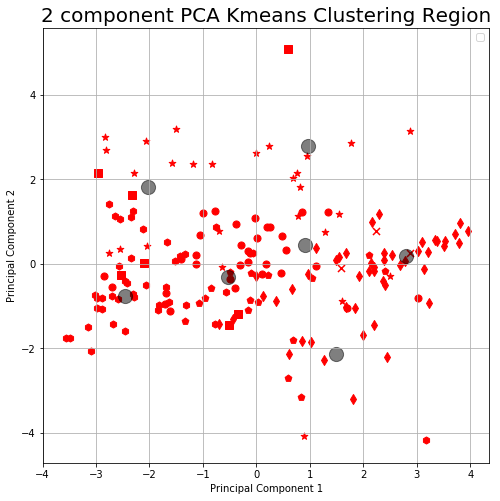

In [158]:
# Plot using matlablib on Region level.
colors_region = ['r', 'g', 'b','c','m','y','k']
pca_plot(colors_region,principalDf,"Region")

region_cluster_labels, region_centers = perform_kmeans(X, 7)
principalDf["Region_Cluster"] = region_cluster_labels
mark_shapes = ['s','d','p','h','o','*','x']

pca_kmeans_plot(colors_region,mark_shapes,principalDf,"Region",region_centers)

In [159]:
# Plot using plotly on Region level.

plot_plotly(principalDf,"Region",region_centers,"Protein Foods")

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



#### Income Level

['Low income' 'Upper middle income' 'Lower middle income' 'High income']


C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning:

Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning:

Legend does not support 'd' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

C:\Use

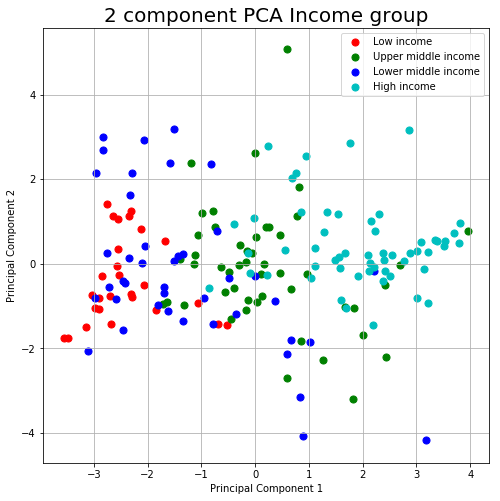

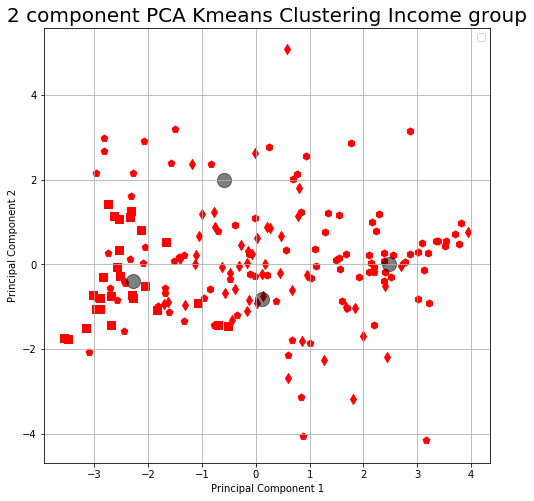

In [160]:
# Plot using matlablib on Income level.

colors_income = ['r', 'g', 'b','c']
pca_plot(colors_income,principalDf,"Income group")
mark_shapes_income = ['s','d','p','h']
income_cluster_labels, income_centers = perform_kmeans(X, 4)
principalDf["Income group_Cluster"] = income_cluster_labels


pca_kmeans_plot(colors_income,mark_shapes_income,principalDf,"Income group",income_centers)

# Output to csv 
principalDf.to_csv("pca_protein.csv")

In [161]:

# Plotly on Income level
plot_plotly(principalDf,"Income group",income_centers,"Protein Foods")

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### Analysis 2: PCA on protein foods + GDP + Urban/Rural ratio + permanent crops ratio 

###### Prepare Dataset
###### For this analysis, we groub bovine meat sheep goat pigmeat and poultry as a food group. Same for milk and egg.We then calculate a urban rural ration by dividing urban population with rural population. Last, we calculate a permanent crops ratio by dividing permanent crop area by total country area. 

###### This results in a dataset with Bovine_Sheep_Pigmeat_Poultry, Cereals, Milk_Egg, Fish_x, Av 2011+2012+2013 extracted from WDI (constant 2010 Us dollars)Urban_Rural_ratio  Permenent_Crops_Ratio, Country, Code, Income group, Region, and Continent as columns. 


In [47]:


protein_group_merged_df['Bovine_Sheep_Pigmeat_Poultry'] = protein_group_merged_df['Bovine meat']+protein_group_merged_df['Sheep and goat meat']+protein_group_merged_df['Pigmeat']+protein_group_merged_df['Poultry']
protein_group_merged_df['Milk_Egg'] = protein_group_merged_df['Milk']+protein_group_merged_df['Eggs']
protein_group_merged_master_df = protein_group_merged_df.merge(master_df,how="left",on="Country")
protein_group_merged_master_df['Urban_Rural_ratio'] = protein_group_merged_master_df["Urban population"]/protein_group_merged_master_df["Rural population"]
protein_group_merged_master_df['Permenent_Crops_Ratio'] = protein_group_merged_master_df['Permanent crops area']/ protein_group_merged_master_df['Total area of the country (excl. coastal waters)']
protein_group_merged_final_master_df = protein_group_merged_master_df.merge(principalDf,how="left",on ="Country")
socio_cols = ['Bovine_Sheep_Pigmeat_Poultry','Cereals','Milk_Egg','Fish_x'
              ,' Av 2011+2012+2013 extracted from WDI (constant 2010 US$)'
              ,'Urban_Rural_ratio','Permenent_Crops_Ratio']

country_cols = ['Country','Code','Income group_y','Region_y','Continent']

desired_cols = socio_cols + country_cols

socio_pca_df = protein_group_merged_final_master_df[desired_cols]
# socio_pca_df.rename({"Income group_y":"Income group","Fish_x":"Fish","Region_y":"Region"},axis = 1,inplace = True)
socio_pca_df.head()


,Bovine_Sheep_Pigmeat_Poultry,Cereals,Milk_Egg,Fish_x,Av 2011+2012+2013 extracted from WDI (constant 2010 US$),Urban_Rural_ratio,Permenent_Crops_Ratio,Country,Code,Income group_y,Region_y,Continent
0,4.82,41.39,6.34,0.02,572.815028,0.328817,0.001838,Afghanistan,AFG,Low income,South Asia,Asia
1,22.20,35.48,32.91,1.50,4271.534293,1.429285,0.026748,Albania,ALB,Upper middle income,Europe & Central Asia,Eurpoe
2,7.18,49.25,15.87,1.23,4555.191581,2.395336,0.003880,Algeria,DZA,Upper middle income,Middle East & North Africa,Africa
3,11.60,19.00,1.53,4.14,3709.969541,0.528939,0.002326,Angola,AGO,Lower middle income,Sub-Saharan Africa,Africa
4,27.84,16.60,13.52,13.11,11929.279270,0.300981,0.022727,Antigua and Barbuda,ATG,High income,Latin America & Caribbean,North America


In [48]:
# Missing Values 
socio_pca_df[pd.isnull(socio_pca_df).any(axis=1)]

,Bovine_Sheep_Pigmeat_Poultry,Cereals,Milk_Egg,Fish_x,Av 2011+2012+2013 extracted from WDI (constant 2010 US$),Urban_Rural_ratio,Permenent_Crops_Ratio,Country,Code,Income group_y,Region_y,Continent
17,38.51,14.63,12.07,12.40,82266.93602,NaN,NaN,Bermuda,BMU,High income,North America,North America
32,48.46,19.07,13.34,17.38,34325.77821,NaN,NaN,"China, Hong Kong SAR",HKG,High income,East Asia & Pacific,Asia
33,34.35,18.57,9.42,15.11,66970.48546,NaN,NaN,"China, Macao SAR",MAC,High income,East Asia & Pacific,Asia
35,25.05,22.13,7.63,8.98,NaN,NaN,NaN,"China, Taiwan Province of",TWN,High income,East Asia & Pacific,Asia
44,2.55,27.69,1.78,2.58,NaN,1.513552,0.019081,Democratic People's Republic of Korea,PRK,Low income,East Asia & Pacific,Asia
46,6.57,37.06,4.65,1.01,NaN,3.036647,0.000000,Djibouti,DJI,Lower middle income,Middle East & North Africa,Africa
57,34.92,20.25,11.51,13.29,NaN,NaN,NaN,French Polynesia,PYF,High income,East Asia & Pacific,Australia
112,27.44,22.12,14.43,7.40,NaN,NaN,NaN,New Caledonia,NCL,High income,East Asia & Pacific,Australia
127,12.77,28.02,16.60,3.63,NaN,0.630905,0.087149,Republic of Moldova,MDA,Lower middle income,Europe & Central Asia,Eurpoe
153,12.46,27.89,15.76,1.43,NaN,1.370286,0.014002,North Macedonia,MKD,Upper middle income,Europe & Central Asia,Europe


In [71]:
# Since missing values cannot be processing using pca, we will simply drop them.

socio_pca_dropped_df = socio_pca_df.dropna()

socio_scaled = StandardScaler().fit_transform(socio_pca_dropped_df[socio_cols])


1

###### PCA

In [87]:
principalComponents_socio = pca.fit_transform(socio_scaled)

# principalDf_socio = pd.DataFrame(data = principalComponents_socio
#              , columns = ['principal component 1', 'principal component 2'])
pc_socio_1,pc_socio_2 = zip(*principalComponents_socio)
socio_pca_dropped_df["principal component 1"] = pc_socio_1
socio_pca_dropped_df["principal component 2"] = pc_socio_2
socio_pca_dropped_df.to_csv("test.csv")
principalDf_socio = socio_pca_dropped_df[["Country","Continent","Income group_y"
                                          ,"Region_y","principal component 1"
                                          ,"principal component 2"]]
principalDf_socio = principalDf_socio.rename({"Income group_y":"Income group","Region_y":"Region"}, axis = 1)
principalDf_socio.to_csv("test.csv")
X_socio = principalDf_socio[["principal component 1","principal component 2"]].values

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



#### Continent Level

['Asia' 'Eurpoe' 'Africa' 'North America' 'South America' 'Australia']


C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning:

Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning:

Legend does not support 'd' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning:

Legend does not support 'p' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-p

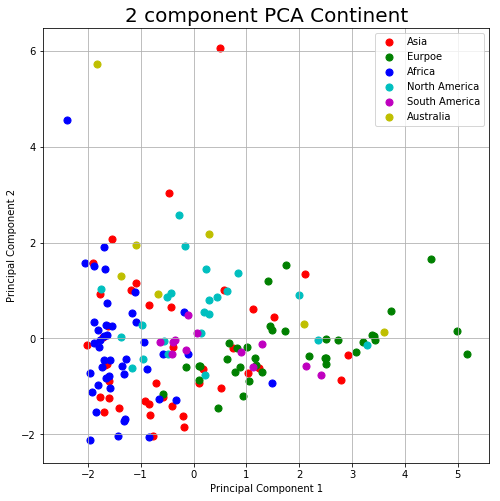

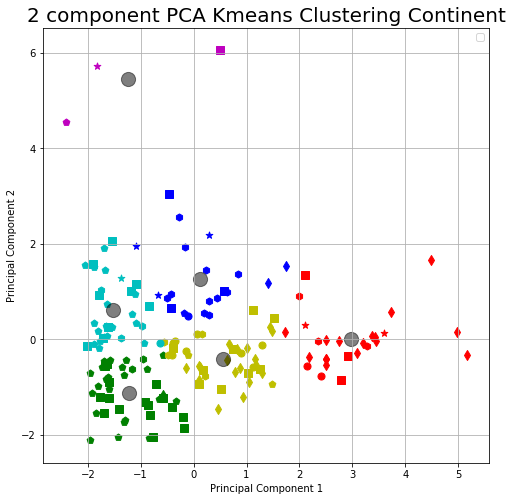

In [88]:
colors_region = ['r', 'g', 'b','c','m','y']
pca_plot(colors_region,principalDf_socio,"Continent")

continent_cluster_labels_socio, continent_centers_socio = perform_kmeans(X_socio, 6)
principalDf_socio["Continent_Cluster"] = continent_cluster_labels_socio
mark_shapes = ['s','d','p','h','o','*','x']

pca_kmeans_plot(colors_region,mark_shapes,principalDf_socio,"Continent",continent_centers_socio)

In [89]:
plot_plotly(principalDf_socio,"Continent",continent_centers_socio,"Socioeconomic + Foods")

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



#### Region Level 

['South Asia' 'Europe & Central Asia' 'Middle East & North Africa'
 'Sub-Saharan Africa' 'Latin America & Caribbean' 'East Asia & Pacific'
 'North America']


C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning:

Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning:

Legend does not support 'd' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning:

Legend does not support 'p' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-p

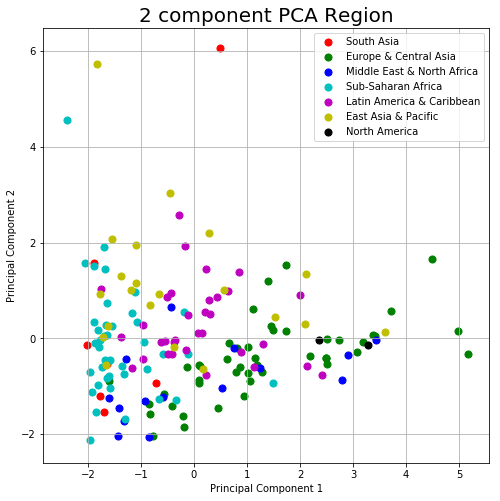

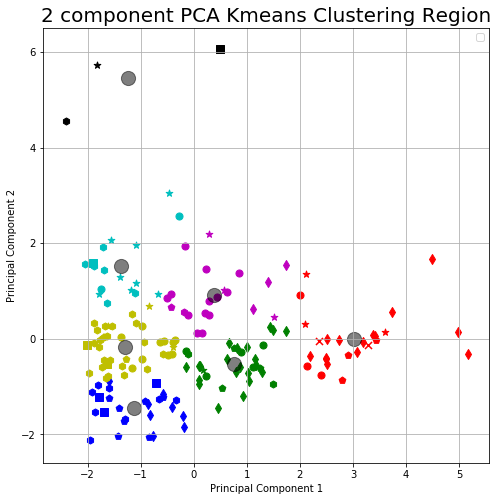

In [90]:
colors_region = ['r', 'g', 'b','c','m','y','k']
pca_plot(colors_region,principalDf_socio,"Region")

region_cluster_labels_socio, region_centers_socio = perform_kmeans(X_socio, 7)
principalDf_socio["Region_Cluster"] = region_cluster_labels_socio
mark_shapes = ['s','d','p','h','o','*','x']

pca_kmeans_plot(colors_region,mark_shapes,principalDf_socio,"Region",region_centers_socio)

In [299]:
plot_plotly(principalDf_socio,"Region",region_centers_socio,"Socioeconomic + Foods")

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



#### Development Level

['Low income' 'Upper middle income' 'Lower middle income' 'High income'
 nan]


C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning:

Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning:

Legend does not support 'd' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:798: UserWarning:

Legend does not support 'p' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-p

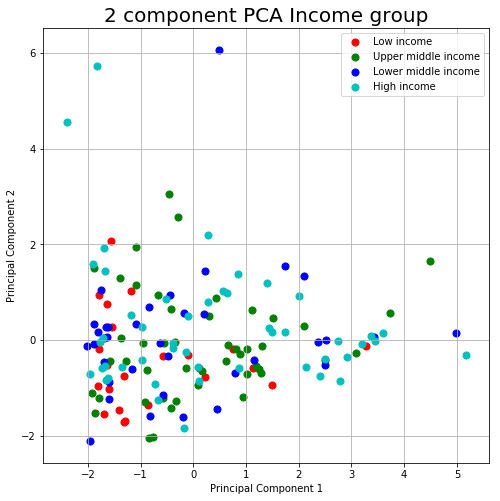

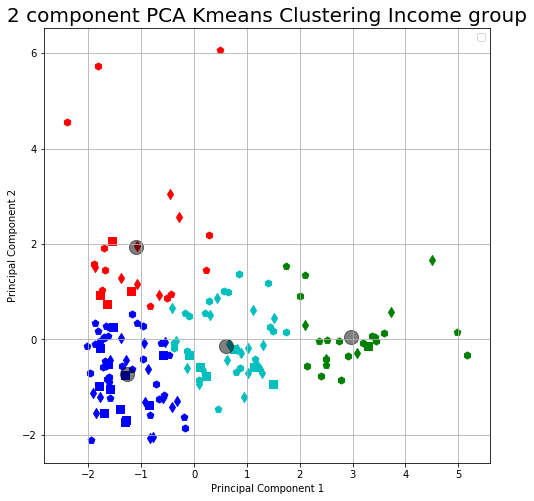

In [52]:
colors_region = ['r', 'g', 'b','c']
pca_plot(colors_region,principalDf_socio,"Income group")

income_cluster_labels_socio, income_centers_socio = perform_kmeans(X_socio, 4)
principalDf_socio["Income group_Cluster"] = income_cluster_labels_socio
mark_shapes = ['s','d','p','h']

pca_kmeans_plot(colors_region,mark_shapes,principalDf_socio,"Income group",income_centers_socio)

principalDf_socio.to_csv("pca_socio.csv")

In [301]:
plot_plotly(principalDf_socio,"Income group",income_centers_socio,"Socioeconomic + Foods")

C:\Users\XuP-intern\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### Analysis 3: PCA on protein foods + GDP + Urban/Rural ratio + permanent crops ratio 

###### Prepare the datasets

In [328]:
# http://apps.who.int/gho/data/node.main.CHILDSTUNTED?lang=en
stunting_df = pd.read_csv("NUTRITION_HA_2.csv", skiprows=1)
overweight_df = pd.read_csv("NUTRITION_WH2.csv",skiprows=1)

In [331]:
stunting_df.head()
stunting_df[stunting_df["Country"] == "China"]

,Country,Year,Both sexes
147,China,2013,8.1
148,China,2010,9.4
149,China,2009,9.0
150,China,2008,9.8
151,China,2005,11.7
152,China,2002,21.8
153,China,2000,17.8
154,China,1998,19.8
155,China,1995,31.2
156,China,1992,38.0


In [304]:
overweight_df.head()

,Country,Year,Both sexes
0,Afghanistan,2013,5.4
1,Afghanistan,2004,4.6
2,Afghanistan,1997,6.5
3,Albania,2017-2018,16.4
4,Albania,2008-2009,23.2


In [310]:
def get_nearest_year(df,name):
    result_df = pd.DataFrame()
    country_list = df["Country"].unique().tolist()
    country_code_new = []
    df[[1,2]] = df['Year'].str.split('-',n=1, expand=True)
    df = df.drop(["Year",2], axis = 1)
    df = df.rename({1:"year"," Both sexes":name},axis = 1)
    df["year"] = df["year"].astype(int)
    for i in country_list:
        try:
            code = country_name_to_country_alpha3(i)
            country_code_new.append(code)
        except:
            code = i 
            country_code_new.append(code)
        result_df = result_df.append(df.loc[[df[df["Country"] == i]["year"].idxmax()]])
#     df["Code"] = df['Country'].apply(lambda x: country_name_to_country_alpha3(x))
    return result_df,country_code_new

In [311]:
result_stunting_df,country_code_new_stunting = get_nearest_year(stunting_df,"stunting(percentage)")
result_overweight_df,country_code_new_overweight = get_nearest_year(overweight_df,"overweight(percentage)")
result_stunting_df["Code"] = country_code_new_stunting
result_overweight_df["Code"] = country_code_new_overweight
result_stunting_df["Code"] = result_stunting_df["Code"].replace(manual_country_code_dict)
result_overweight_df["Code"] = result_overweight_df["Code"].replace(manual_country_code_dict)

In [326]:
result_overweight_df[result_overweight_df["Country"] == "Spain"]

,Country,overweight(percentage),year,Code


In [320]:
protein_group_merged_stunting_master_df = protein_group_merged_master_df.merge(result_stunting_df,how="left", on="Code")
protein_group_merged_stunting_ow_master_df = protein_group_merged_stunting_master_df.merge(result_overweight_df,how="left", on="Code")

In [332]:
protein_group_merged_stunting_ow_master_df[protein_group_merged_stunting_ow_master_df["stunting(percentage)"].isna()]

,Country_x,Milk_x,Bovine meat_x,Sheep and goat meat_x,Pigmeat_x,Poultry_x,Eggs_x,Fish_x,Maize_x,Rice_x,...,index,Av 1992+2002+2012 extracted from WDI,Urban_Rural_ratio,Permenent_Crops_Ratio,Country_y,stunting(percentage),year_x,Country,overweight(percentage),year_y
4,Antigua and Barbuda,12.22,5.39,0.60,3.26,18.59,1.30,13.11,0.39,2.15,...,10.0,9752.391081,0.300981,0.022727,NaN,NaN,NaN,NaN,NaN,NaN
8,Austria,21.55,6.90,0.40,14.66,7.85,4.39,3.99,2.35,0.70,...,12.0,33283.201607,1.894326,0.007785,NaN,NaN,NaN,NaN,NaN,NaN
10,Bahamas,9.09,9.52,1.88,8.82,17.14,1.92,7.47,0.70,4.61,...,NaN,NaN,4.767442,0.002882,NaN,NaN,NaN,NaN,NaN,NaN
14,Belgium,23.38,5.60,0.50,9.23,4.52,3.88,6.54,0.32,1.62,...,NaN,NaN,39.305455,0.007206,NaN,NaN,NaN,NaN,NaN,NaN
17,Bermuda,8.95,17.49,1.80,5.96,13.26,3.12,12.40,0.18,1.02,...,25.0,58903.745990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Canada,13.22,11.17,0.35,6.45,13.14,3.74,5.55,2.49,2.07,...,33.0,32478.583177,4.304103,0.004877,NaN,NaN,NaN,Canada,10.4,2004.0
32,"China, Hong Kong SAR",8.81,9.86,0.66,16.64,21.30,4.53,17.38,0.49,7.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,"China, Macao SAR",4.94,4.57,0.31,17.35,12.12,4.48,15.11,0.05,7.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,"China, Taiwan Province of",3.80,2.05,0.35,11.70,10.95,3.83,8.98,1.27,8.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,Croatia,19.05,4.55,0.51,10.32,2.94,2.55,5.88,1.65,0.47,...,97.0,9748.038268,1.392539,0.013960,NaN,NaN,NaN,NaN,NaN,NaN
